## CLASSIFICATION OF HEART DISEASE USING LOGISTIC REGRESSION MODEL


In [1]:
## Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
## Reading the Dataset 
data = pd.read_csv('heart.csv', encoding='unicode_escape')
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

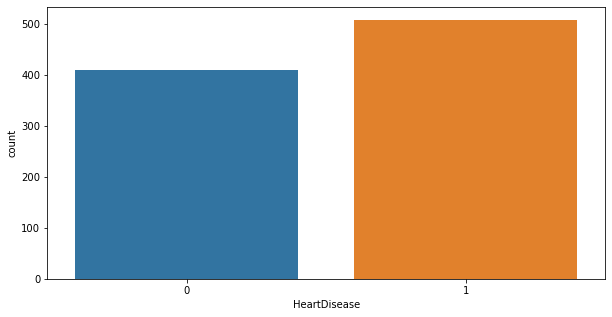

In [4]:
sns.countplot(x = "HeartDisease", data = data)                       # Plot for analyzing heart disease in the data

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

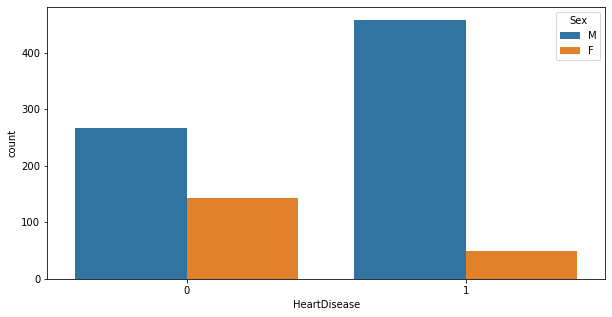

In [5]:
sns.countplot(x = "HeartDisease", hue = "Sex", data = data)        # Plot for analyzing heart disease in males and females

<AxesSubplot:ylabel='Frequency'>

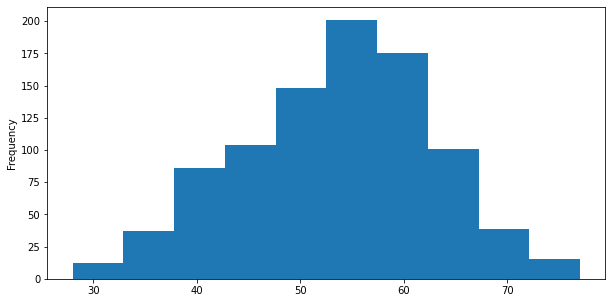

In [6]:
data["Age"].plot.hist()                                              # Plot for analyzing patient's ages in the data

## DATA WRANGLING 

In [7]:
data.isnull().sum()                                                 # To check wether the data contains any null values
#sns.heatmap(data.isnull(), yticklabels = False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## String Data Conversion to Int

In [8]:
def dataReplace(data):
    '''
    This fucntion converts string data type to int data type.
    The model takes the following arguments:
    
    Data (Features containing String data type)
    
    returns:
    Data (Features converted to Int data type)
    '''
    
    data['Sex'][data['Sex'] == 'F'] = 0                                    # Replace F with 0
    data['Sex'][data['Sex'] == 'M'] = 1                                    # Replace M with 1

    data['ChestPainType'][data['ChestPainType'] == 'ATA'] = 0              # Replace ATA with 0
    data['ChestPainType'][data['ChestPainType'] == 'NAP'] = 1              # Replace NAP with 1
    data['ChestPainType'][data['ChestPainType'] == 'ASY'] = 2              # Replace ASY with 2
    data['ChestPainType'][data['ChestPainType'] == 'TA'] = 3               # Replace TA with 3

    data['RestingECG'][data['RestingECG'] == 'Normal'] = 0                 # Replace Normal with 0
    data['RestingECG'][data['RestingECG'] == 'ST'] = 1                     # Replace ST with 1
    data['RestingECG'][data['RestingECG'] == 'LVH'] = 2                    # Replace LVH with 2

    data['ExerciseAngina'][data['ExerciseAngina'] == 'N'] = 0              # Replace N with 0
    data['ExerciseAngina'][data['ExerciseAngina'] == 'Y'] = 1              # Replace Y with 1

    data['ST_Slope'][data['ST_Slope'] == 'Up'] = 0                         # Replace Up with 0
    data['ST_Slope'][data['ST_Slope'] == 'Flat'] = 1                       # Replace Flat with 1
    data['ST_Slope'][data['ST_Slope'] == 'Down'] = 2                       # Replace Down with 2

    return data

## Feature Scaling

In [9]:
def scale(data):
    '''
    This fucntion performs data scaling from -1 to 1 using min-max critera.
    The model takes the following arguments:
    
    Data (numpy array): Input dataset
    
    returns:
    Scaled Data (numpy array)
    '''
    
    dataScale = 2*((data - data.min()) / (data.max() - data.min())) - 1    # Feature Scaling from -1 to 1
    dataScale['HeartDisease'] = data['HeartDisease']                       # Not applying Scaling on Y
    return dataScale

## Dataset Splitting

In [10]:
data = dataReplace(data)                          # Calling the Data Conversion Function and assigning it to variable data
data = scale(data)                                # Calling the Feature Scaling Function and assigning it to variable data

# Splitting the Dataset into Train set(60%), Cross Validation set(20%) and Test set(20%).
train, val, test = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])
print(train.shape)
print(val.shape)
print(test.shape)
data.head()

(550, 12)
(184, 12)
(184, 12)


<ipython-input-8-41c5cb290b52>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][data['Sex'] == 'F'] = 0                                    # Replace F with 0
<ipython-input-8-41c5cb290b52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'][data['Sex'] == 'M'] = 1                                    # Replace M with 1
<ipython-input-8-41c5cb290b52>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ChestPainT

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.510204,1.0,-1.0,0.4,-0.041459,-1.0,-1.0,0.577465,-1.0,-0.409091,-1.0,0
1,-0.142857,-1.0,-0.333333,0.6,-0.402985,-1.0,-1.0,0.352113,-1.0,-0.181818,0.0,1
2,-0.632653,1.0,-1.0,0.3,-0.06136,-1.0,0.0,-0.464789,-1.0,-0.409091,-1.0,0
3,-0.183673,-1.0,0.333333,0.38,-0.290216,-1.0,-1.0,-0.323944,1.0,-0.068182,0.0,1
4,0.061224,1.0,-0.333333,0.5,-0.353234,-1.0,-1.0,-0.126761,-1.0,-0.409091,-1.0,0


## Features and Labels Extraction

In [11]:
X_data = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", 
          "ExerciseAngina", "Oldpeak", "ST_Slope"]                # Extracting Features
Y_data = ["HeartDisease"]                                         # Extracting Labels

X_train = train[X_data]                                           # Assigning Features to X_train               
Y_train = train[Y_data]                                           # Assigning Features to Y_train

X_val = val[X_data]                                               # Assigning Features to X_val
Y_val = val[Y_data]                                               # Assigning Features to Y_val

X_test = test[X_data]                                             # Assigning Features to X_test
Y_test = test[Y_data]                                             # Assigning Features to Y_test

In [12]:
X_train = X_train.values                                          # Extracting values from X_train
Y_train = Y_train.values                                          # Extracting values from Y_train

X_val = X_val.values                                              # Extracting values from X_val
Y_val = Y_val.values                                              # Extracting values from Y_val

X_test = X_test.values                                            # Extracting values from X_test
Y_test = Y_test.values                                            # Extracting values from Y_test

In [13]:
X_train = X_train.T                                               # Taking Transpose of the Training Features
Y_train = Y_train.reshape(1, X_train.shape[1])                    # Reshaping Training Labels 
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)

X_val = X_val.T                                                   # Taking Transpose of the Cross Validation Features
Y_val = Y_val.reshape(1, X_val.shape[1])                          # Reshaping Cross Validation Labels 
print("Shape of X_val : ", X_val.shape)
print("Shape of Y_val : ", Y_val.shape)

X_test = X_test.T                                                 # Taking Transpose of the Testing Features
Y_test = Y_test.reshape(1, X_test.shape[1])                       # Reshaping Testing Labels 
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (11, 550)
Shape of Y_train :  (1, 550)
Shape of X_val :  (11, 184)
Shape of Y_val :  (1, 184)
Shape of X_test :  (11, 184)
Shape of Y_test :  (1, 184)


## Sigmoid Function

In [14]:
def sigmoid(x):
    '''
    This fucntion creates a Sigmoid Funtion on given features and features.
    The model takes the following arguments:
    
    X (numpy array): Input data
    
    returns:
    Sigmoid Function
    '''
    return 1/(1 + np.exp(-x))

## Logistic Regression Model

In [15]:
def model(X, Y, X_val, Y_val, learning_rate, iterations, lamda, verbose = True):
    '''
    This fucntion creates a model and trains it on the supplied dataset using the
    provided learning rate and regularization for a given number of iterations.
    The model takes the following arguments:
    
    X (numpy array): Input dataset
    Y (numpy array): Actual labels
    learning_rate (float): 0.001
    iterations (int): 30000
    lamda (float): [0, 0.01, 0.1, 1, 10]
    
    returns:
    W (numpy array): The weights of the model
    B (numpy array): The Bias value of the model
    cost_list (list): list of all the cost values for the given iterations
    '''
    
    m = X.shape[1]                                           # Number of Training Examples
    n = X.shape[0]                                           # Number of Features 
    
    m_val = X_val.shape[1]
    n_val = X_val.shape[0]
    
    W = np.zeros((n,1))                                      # Intiallizing wieghts to zero
    B = 0                                                    # Initiallizing bias to zero
    
    cost_list = []                                           # Initialling Cost Function List as empty
    val_cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B                               # Linear Regression Hypothesis Model 
        h = sigmoid(Z)                                       # Applying Sigmoid Funtion on Linear Regression Hypothesis
        
        Z_val = np.dot(W.T, X_val) + B
        h_val = sigmoid(Z_val)
        
        # Cost Function
        cost = (-(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))) + ((lamda / (2 * m)) * np.sum(W**2))
        
        # Validation Set Error Estimation 
        cost_val = (-(1 / m_val) * np.sum(Y_val * np.log(h_val) + (1 - Y_val) * np.log(1 - h_val)))
        
        # Gradient Descent
        dW = (1 / m) * np.dot(h - Y, X.T)
        dB = (1 / m) * np.sum(h - Y)
        
        W = W - learning_rate * (dW.T + ((lamda / m) * W))    # Applying Regularization
        B = B - learning_rate * dB
        
        # Keeping track of our cost function values
        cost_list.append(cost)                                # Stacking all train costs in a list
        val_cost_list.append(cost_val)                        # Stacking all validation costs in a list
    

        if verbose:
            if(i%(iterations/10) == 0):
                print("cost after ", i , "iteration is : ", cost)
                h[h>0.5] = 1
                h[h<=0.5] = 0
                print("Accuracy:", ((h == Y).sum())/Y.shape[1])
                print("Weight afters", i , "iteration is : ", W)
        
    return W, B, cost_list, val_cost_list


## Model Selection (Degree of Polynomials)

Polynomial 1 and Lambda 0
Min Train Cost Error = 0.35789079511526384
Min Validation Error = 0.43019075296067516
Polynomial 2 and Lambda 0
Min Train Cost Error = 0.3196464369009978
Min Validation Error = 0.3980184657914408
Polynomial 4 and Lambda 0
Min Train Cost Error = 0.31625562587399375
Min Validation Error = 0.39376409034110493
Polynomial 8 and Lambda 0
Min Train Cost Error = 0.3165995360623115
Min Validation Error = 0.4004714484619931
Polynomial 10 and Lambda 0
Min Train Cost Error = 0.31702086354675035
Min Validation Error = 0.4030006495849325
Polynomial 12 and Lambda 0
Min Train Cost Error = 0.3172616781201052
Min Validation Error = 0.4033420104713509


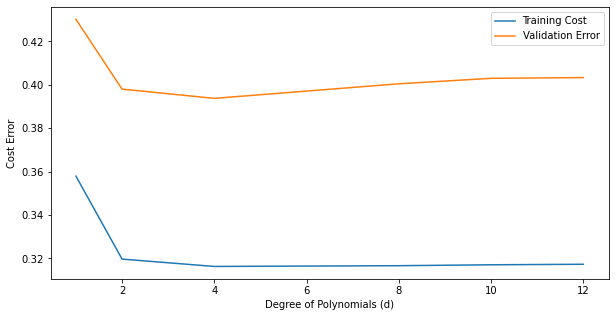

In [16]:
iterations = 10000                                              # Number of times the Model will run to optimize parameters
learning_rate = 0.03                                            # Alpha is the step frequency for Gradient Descent
lamdas = [0, 0.01, 0.1, 1, 10]                                  # Regularization Parameters
polynomials = [1, 2, 4, 8, 10, 12]                              # Degree of Polynomials

minCostArray = []                                               
minValArray = []                                               

for poly in polynomials:
    train_X = X_train.copy()                                    # Make a copy of Training Features and Assign it to the variable
    val_X = X_val.copy()                                        # Make a copy of Validation Features and Assign it to the variable 
        
    for i in range(1, poly):
        train_X = np.append(train_X, X_train**poly, axis = 0)   # Designing multiple Degree Polynomial Features for Training Set   
        val_X = np.append(val_X, X_val**poly, axis = 0)         # Designing 2nd Degree Polynomial Features for Validation Set
    
    for reg_param in lamdas:
        print(f"Polynomial {poly} and Lambda {reg_param}")
        W, B, cost_list, val_cost_list = model(train_X.astype('float'), Y_train.astype('float'), val_X.astype('float'), Y_val.astype('float'), learning_rate = learning_rate, iterations = iterations, lamda = reg_param, verbose = False)
    
        print('Min Train Cost Error = ' + str(np.min(cost_list)))            # Determining Minimum Training Cost Error
        print('Min Validation Error = ' + str(np.min(val_cost_list)))        # Determining Minimum Validation Error
        
        
        if reg_param == 0:
            minCost = np.min(cost_list)                          # Determine min cost error from cost list
            minCostArray.append(minCost)                         # Append all min cost errors
            minValCost = np.min(val_cost_list)                   # Determine min val cost error from val cost list
            minValArray.append(minValCost)                       # Append all min cost errors
            break
            
plt.figure()
plt.plot(polynomials, minCostArray)
plt.plot(polynomials, minValArray)
plt.xlabel('Degree of Polynomials (d)')
plt.ylabel('Cost Error')
plt.legend(["Training Cost", "Validation Error"], loc ="upper right")
plt.show()

## Regularization Parameter Selection

Polynomial 2 and Lambda 0
Min Train Cost Error = 0.3196464369009978
Min Validation Error = 0.3980184657914408
Polynomial 2 and Lambda 0.01
Min Train Cost Error = 0.3197685625083855
Min Validation Error = 0.3980163992125366
Polynomial 2 and Lambda 0.1
Min Train Cost Error = 0.32084852413413717
Min Validation Error = 0.397997942083618
Polynomial 2 and Lambda 1
Min Train Cost Error = 0.3301125344294627
Min Validation Error = 0.39782823045048804
Polynomial 2 and Lambda 10
Min Train Cost Error = 0.3762795712454424
Min Validation Error = 0.3985354050776513
Polynomial 2 and Lambda 20
Min Train Cost Error = 0.40519308332239484
Min Validation Error = 0.4040385320880448


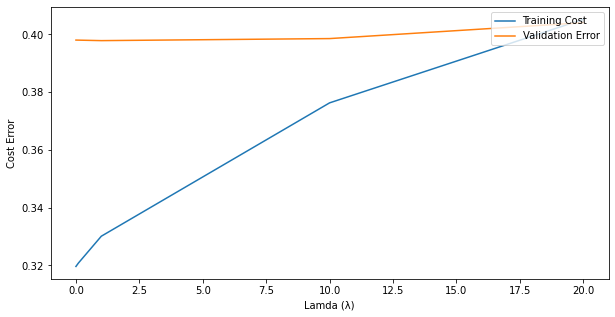

In [17]:
iterations = 10000                                              # Number of times the Model will run to optimize parameters
learning_rate = 0.03                                            # Alpha is the step frequency for Gradient Descent
lamdas = [0, 0.01, 0.1, 1, 10, 20]                              # Regularization Parameters
polynomials = [1, 2, 4, 8, 10, 12]                              # Degree of Polynomials

minCostArray = []
minValArray = []

for poly in polynomials:
    train_X = X_train.copy()                                    # Make a copy of Training Features and Assign it to the variable
    val_X = X_val.copy()                                        # Make a copy of Validation Features and Assign it to the variable
        
    for i in range(1, poly):
        train_X = np.append(train_X, X_train**poly, axis = 0)   # Designing multiple Degree Polynomial Features for Training Set
        val_X = np.append(val_X, X_val**poly, axis = 0)         # Designing 2nd Degree Polynomial Features for Validation Set
    
        if poly == 2:
            for reg_param in lamdas:
                print(f"Polynomial {poly} and Lambda {reg_param}")
                W, B, cost_list, val_cost_list = model(train_X.astype('float'), Y_train.astype('float'), val_X.astype('float'), Y_val.astype('float'), learning_rate = learning_rate, iterations = iterations, lamda = reg_param, verbose = False)

                
                minCost = np.min(cost_list)                      # Determine min cost error from cost list
                minCostArray.append(minCost)                     # Append all min cost errors
                minValCost = np.min(val_cost_list)               # Determine min val cost error from val cost list
                minValArray.append(minValCost)                   # Append all min cost errors
                
                print('Min Train Cost Error = ' + str(np.min(cost_list)))             # Determining Minimum Training Cost Error
                print('Min Validation Error = ' + str(np.min(val_cost_list)))         # Determining Minimum Validation Error
plt.figure()
plt.plot(lamdas, minCostArray)
plt.plot(lamdas, minValArray)
plt.xlabel('Lamda (λ)')
plt.ylabel('Cost Error')
plt.legend(["Training Cost", "Validation Error"], loc ="upper right")
plt.show()
                

## 